# **Lab 1- Write a python program to implement Perceptron for understanding single-layer neural network.**

---



```

*   A single layer neural network often called a Perceptron consists of an input layer and an output layer with no hidden layers in between.
*   It functions as a linear binary classifier. Data is classified that can be seperated by a straight line or plane.
*   Each input feature is connected to the output neuron by a weight, determining its significance.
*   The weighted sum of the inputs is computed and then passed through an activation function(like the step function) to produce final output.
*   The Perceptron learning rule is used to adjust the weights and bias during training to minimize prediction errors.

```
----
###Note ----> Single layer perceptrons have certain limitations. They are unable to solve non-linearly separable problems like XOR gate. In such case , multi layer perceptrons (i.e. having  hidden layers) and different activation functions are required.
----

###Activation function used

```

* The unit step activation function, also known as the Heaviside step function, is a non-linear function that outputs a 0 for a negative input and a 1 for a positive or zero input.
* It is commonly used in binary classification problems.

* The formula for the unit step activation function, denoted as H(x), is:

    H(x)={0  for x<0
          1  for x≥0 }


```


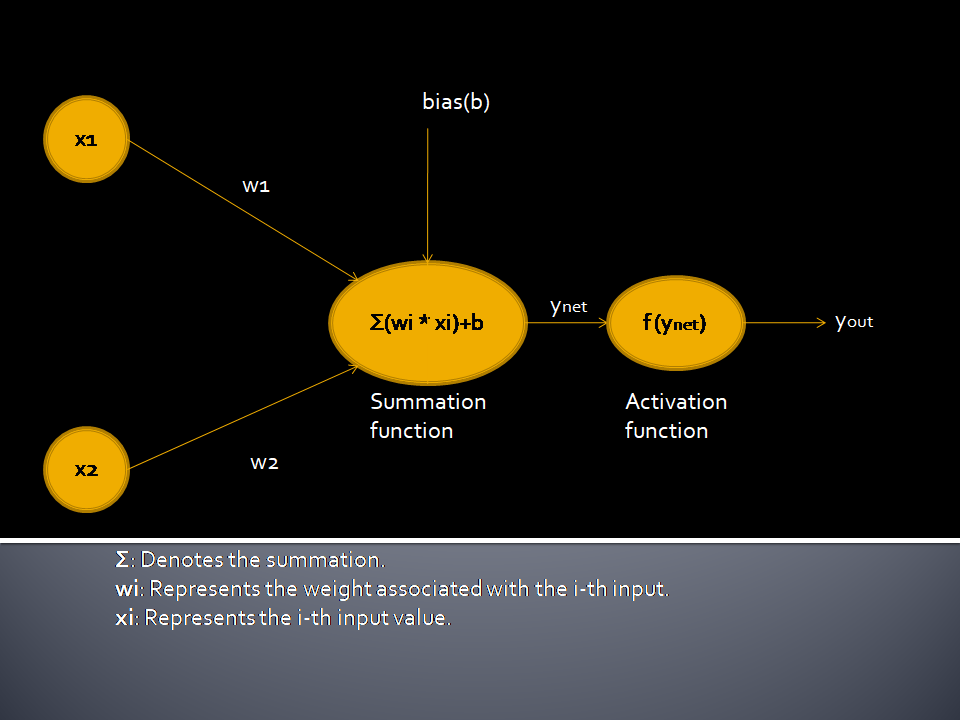

In [ ]:
class Perceptron:
  def __init__(self, num_features=2,learning_rate=0.01,epochs=5):
    #Initialize weights and bias
    self.weights=[0.0]*num_features   # The weights determine the importance of each input.
    self.bias=0.0     # The bias is a constant value added to the weighted sum of inputs and helps the model fit data better.
    self.learning_rate=learning_rate    # the learning rate controls how much the weights and bias are adjusted during training.
    self.epochs=epochs    # the number of epochs tell the number of times the model will iterate over the entire training dataset.

  def activation_func(self, weighted_sum):
    return 1 if weighted_sum>=0 else 0  # Step function is used as an  activation function here

  def predict(self, inputs):
    #Calculate the weighted sum of inputs and apply activation function
    weighted_sum=self.bias
    for i in range(len(inputs)):
      weighted_sum+=inputs[i]*self.weights[i]
    return self.activation_func(weighted_sum)

  def train(self, training_data, labels):
    for epoch in range(self.epochs):
      for i in range(len(training_data)):
        inputs=training_data[i] # inputs contain training sample in form of list
        target=labels[i] # target contains actual output
        predicted=self.predict(inputs)  # predict the output for current input
        # Finding error
        error=target-predicted
        # Bias updation
        self.bias+=self.learning_rate*error
        # Weights updation
        for j in range(len(inputs)):
          self.weights[j]+=self.learning_rate*error*inputs[j]


In [ ]:
if __name__=='__main__':
  training_inputs=[[0,0],[0,1],[1,0],[1,1]]
  and_labels=[0,0,0,1]  # Output of and gate
  or_labels=[0,1,1,1]   # Output of or gate

  # For AND gate
  perceptron_and=Perceptron() # Create an object of Perceptron class for AND gate
  perceptron_and.train(training_inputs,and_labels)
  print("Predictions for AND gate : ")
  for inputs in training_inputs:
    prediction=perceptron_and.predict(inputs)
    print(f"Input : {inputs}, Prediction : {prediction}")

  # For OR gate
  perceptron_or=Perceptron()  # Create an object of Perceptron class for OR gate
  perceptron_or.train(training_inputs,or_labels)
  print("Predictions for OR gate : ")
  for inputs in training_inputs:
    prediction=perceptron_or.predict(inputs)
    print(f'Inputs : {inputs} , Prediction : {prediction}')



Predictions for AND gate : 
Input : [0, 0], Prediction : 0
Input : [0, 1], Prediction : 0
Input : [1, 0], Prediction : 0
Input : [1, 1], Prediction : 1
Predictions for OR gate : 
Inputs : [0, 0] , Prediction : 0
Inputs : [0, 1] , Prediction : 1
Inputs : [1, 0] , Prediction : 1
Inputs : [1, 1] , Prediction : 1
